In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd

df = pd.read_csv('/Users/llately/Desktop/上课/2019fall/6574/HW/hw3/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Unnamed: 10,Unnamed: 11,Source - https://www.kaggle.com/harrywang/housing#housing.csv
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,NaN,NaN,NaN
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,NaN,NaN,NaN
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,NaN,NaN,NaN
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,NaN,NaN,NaN
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,NaN,NaN,NaN


In [2]:
df.head() #To know the attributes of the data set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Unnamed: 10,Unnamed: 11,Source - https://www.kaggle.com/harrywang/housing#housing.csv
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,NaN,NaN,NaN
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,NaN,NaN,NaN
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,NaN,NaN,NaN
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,NaN,NaN,NaN
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,NaN,NaN,NaN


In [3]:
df['ocean_proximity'].apply(lambda x: x.replace('INLAND', '10').replace('<1H OCEAN', '10').replace('NEAR BAY','100').replace('NEAR OCEAN','1000').replace('ISLAND','10000')).astype('float')
#This is a simple data cleaning but I don't know why the following cells still shows no figure of ocean_proximity

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
5        100.0
6        100.0
7        100.0
8        100.0
9        100.0
10       100.0
11       100.0
12       100.0
13       100.0
14       100.0
15       100.0
16       100.0
17       100.0
18       100.0
19       100.0
20       100.0
21       100.0
22       100.0
23       100.0
24       100.0
25       100.0
26       100.0
27       100.0
28       100.0
29       100.0
         ...  
20610     10.0
20611     10.0
20612     10.0
20613     10.0
20614     10.0
20615     10.0
20616     10.0
20617     10.0
20618     10.0
20619     10.0
20620     10.0
20621     10.0
20622     10.0
20623     10.0
20624     10.0
20625     10.0
20626     10.0
20627     10.0
20628     10.0
20629     10.0
20630     10.0
20631     10.0
20632     10.0
20633     10.0
20634     10.0
20635     10.0
20636     10.0
20637     10.0
20638     10.0
20639     10.0
Name: ocean_proximity, Length: 20640, dtype: float64

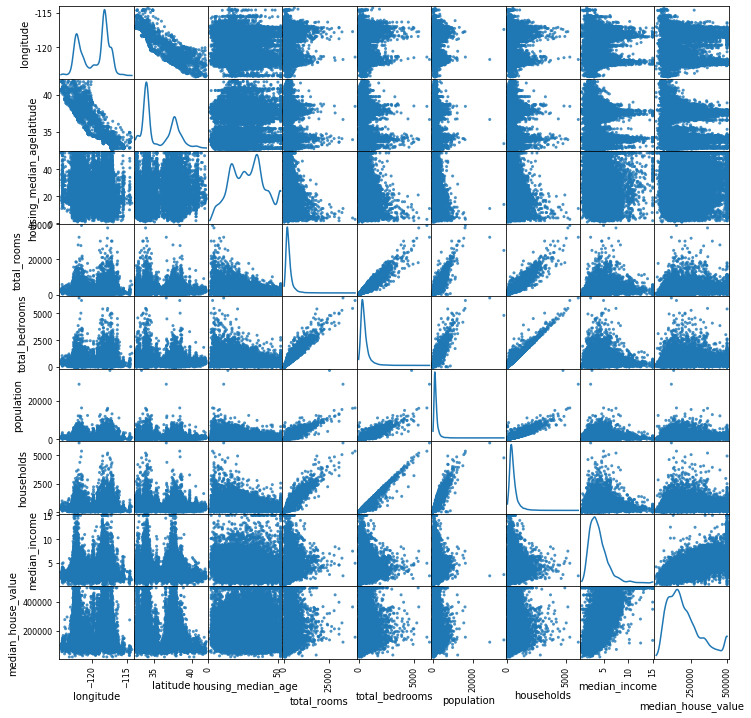

In [5]:
smaller_frame=df[['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)
#visulize some colums described in numbers of the data set

In [6]:
#Perfome a correlation analysis on the attributes to determine which of them are highly correlated
smaller_frame.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Text(0.5, 1.0, 'cdf of house latitude')

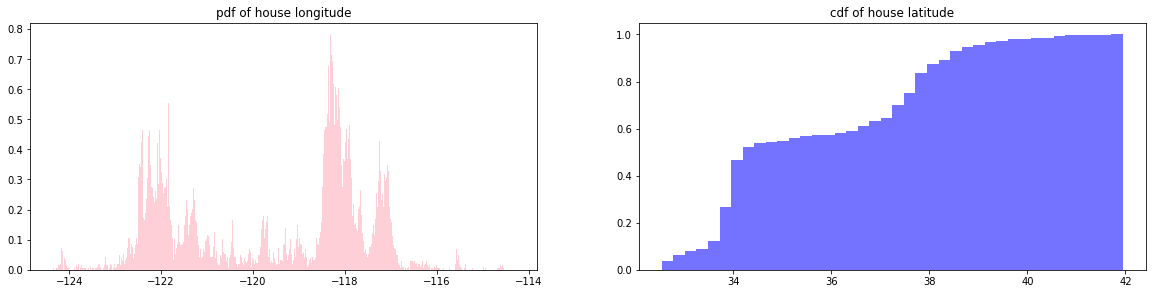

In [7]:
#Show the distribution of houses with different longitude and latitude within the data set
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10)) # define the figure on init with the figsize parameter
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.hist(df.longitude, bins=1000, density = True, color='pink',alpha = 0.75) #while density is True, shows frequency between 0 to 1
ax2.hist(df.latitude, bins =40, density = True, cumulative = True, color ='blue', alpha = 0.55) #while density is False, shows the actual time that it shows up
ax1.set_title('pdf of house longitude')  
ax2.set_title('cdf of house latitude')

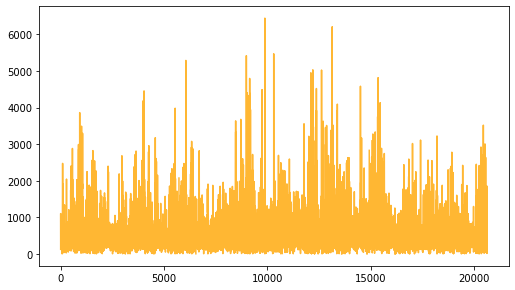

In [8]:
fig = plt.figure(figsize=(18.5, 10.5)) #define the figure on init with the figsize parameter

ax1 = fig.add_subplot(2, 2, 1)

ax1.plot(df.total_bedrooms, color = 'orange',alpha = 0.8)
#plot on raw data is meaningleass, I can train the model using the corelations parameters to perform a linear regression but just to show plot grammar:

In [9]:
from collections import Counter
Counter(df.ocean_proximity)


Counter({'NEAR BAY': 2290,
         '<1H OCEAN': 9136,
         'INLAND': 6551,
         'NEAR OCEAN': 2658,
         'ISLAND': 5})

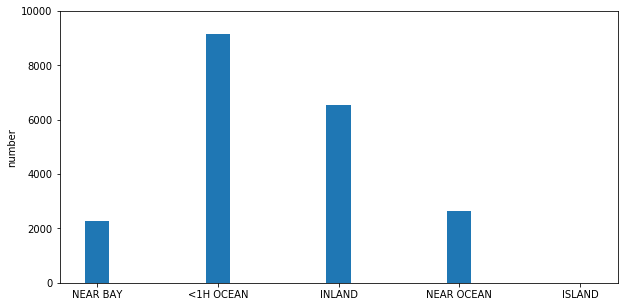

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5)) #We can define the figure on init with the figsize parameter

ax1 = fig.add_subplot(1, 1, 1)
#ax3 = fig.add_subplot(2, 2, 3)

"""bar(x, height, width, bottom, *, align='center', **kwargs)"""
labels = ['NEAR BAY','<1H OCEAN','INLAND','NEAR OCEAN','ISLAND']
values = [2290,9136,6551,2658,5]

ax1.bar(labels, values, width = .2)

plt.ylim(0, 10000)  #The range of y
plt.ylabel("number")

plt.show()


(-1.127512113269917, 1.11311362145978, -1.1222418557926366, 1.1010591360023714)

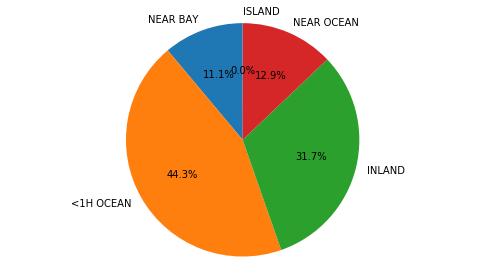

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(18.5, 10.5)) 
ax1 = fig.add_subplot(2, 2, 1)
labels = 'NEAR BAY','<1H OCEAN','INLAND','NEAR OCEAN','ISLAND'
sizes = [2290,9136,6551,2658,5]

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle = 90, pctdistance = 0.6) #pctfistance is the distance between the number to the center
ax1.axis('equal') 

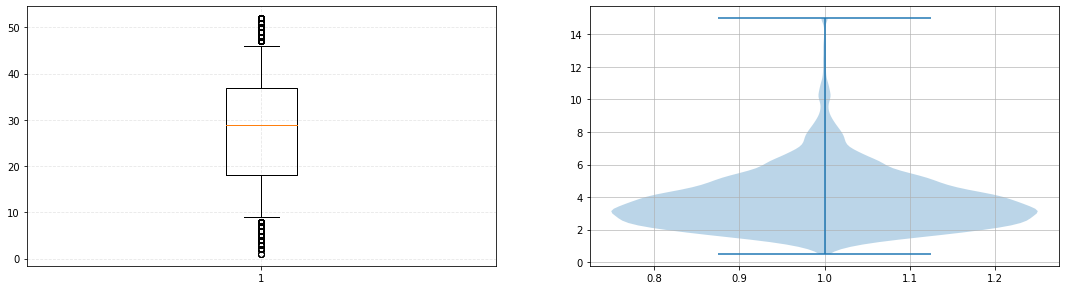

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(18.5, 10.5)) 
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
data = df.housing_median_age
data2 = df.median_income
ax1.boxplot(data, whis=.5) 
ax2.violinplot(data2)
ax1.grid(linestyle="--", alpha=0.3)
ax2.grid(linestyle="-", alpha=0.8)